In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('full_data_new.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)
df.head(n=5)

,userId,movieId,rating,timestamp,title,genres_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes,directors,writers
0,1748,296,3.0,1025293612,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
1,1920,296,5.0,1425578962,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
2,2177,296,4.0,882349917,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
3,2982,296,5.0,1105584969,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
4,3150,296,3.5,1216177794,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357955 entries, 0 to 357954
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userId          357955 non-null  int64  
 1   movieId         357955 non-null  int64  
 2   rating          357955 non-null  float64
 3   timestamp       357955 non-null  int64  
 4   title           357955 non-null  object 
 5   genres_x        357955 non-null  object 
 6   tconst          357955 non-null  object 
 7   titleType       357955 non-null  object 
 8   primaryTitle    357955 non-null  object 
 9   originalTitle   357955 non-null  object 
 10  isAdult         357955 non-null  int64  
 11  startYear       357955 non-null  int64  
 12  endYear         357955 non-null  object 
 13  runtimeMinutes  357955 non-null  object 
 14  genres_y        357955 non-null  object 
 15  averageRating   357955 non-null  float64
 16  numVotes        357955 non-null  int64  
 17  directors 

There are more than 357k entries with 18 different attributes in the concetenated dataset from the IMDB and movielens dataset.

### Number of Unique Movies

In [5]:
no_of_movies = df['movieId'].unique()

In [6]:
print("There are " + str(len(no_of_movies)) + " unique movies.")

There are 2073 unique movies.


### Number of Unique Users

In [7]:
no_of_users = df['userId'].unique()

In [8]:
print("There are " + str(len(no_of_users)) + " unique users.")

There are 188 unique users.


### Converting timestamp column to the timestamp type to extract year and month and sort the records by timestamp

In [9]:
df['timestamp'] = df['timestamp'].apply(datetime.fromtimestamp)


In [10]:
df.head(n=5)

,userId,movieId,rating,timestamp,title,genres_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes,directors,writers
0,1748,296,3.0,2002-06-29 03:46:52,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
1,1920,296,5.0,2015-03-06 02:09:22,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
2,2177,296,4.0,1997-12-17 17:11:57,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
3,2982,296,5.0,2005-01-13 10:56:09,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"
4,3150,296,3.5,2008-07-16 11:09:54,Pulp Fiction,Comedy|Crime|Drama|Thriller,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1844550,nm0000233,"nm0000233,nm0000812"


In [11]:
df.tail()

,userId,movieId,rating,timestamp,title,genres_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes,directors,writers
357950,151214,1913,2.0,2000-11-23 20:57:05,Picnic at Hanging Rock,Drama|Mystery,tt0073540,movie,Picnic at Hanging Rock,Picnic at Hanging Rock,0,1975,\N,115,"Drama,Mystery",7.5,34084,nm0001837,"nm0512243,nm0337730"
357951,156480,1913,4.5,2005-12-10 05:16:07,Picnic at Hanging Rock,Drama|Mystery,tt0073540,movie,Picnic at Hanging Rock,Picnic at Hanging Rock,0,1975,\N,115,"Drama,Mystery",7.5,34084,nm0001837,"nm0512243,nm0337730"
357952,160747,1913,3.5,2016-10-19 05:29:46,Picnic at Hanging Rock,Drama|Mystery,tt0073540,movie,Picnic at Hanging Rock,Picnic at Hanging Rock,0,1975,\N,115,"Drama,Mystery",7.5,34084,nm0001837,"nm0512243,nm0337730"
357953,162047,1913,1.0,2016-03-27 23:13:04,Picnic at Hanging Rock,Drama|Mystery,tt0073540,movie,Picnic at Hanging Rock,Picnic at Hanging Rock,0,1975,\N,115,"Drama,Mystery",7.5,34084,nm0001837,"nm0512243,nm0337730"
357954,162516,1913,2.0,2007-04-04 09:07:07,Picnic at Hanging Rock,Drama|Mystery,tt0073540,movie,Picnic at Hanging Rock,Picnic at Hanging Rock,0,1975,\N,115,"Drama,Mystery",7.5,34084,nm0001837,"nm0512243,nm0337730"


In [12]:
years = df.startYear.unique()
converted_list = []

for element in years:
    converted_list.append(str(element).strip())
    
#converted_list.remove('\\N')
test_list = [int(i) for i in converted_list] 
allYears = sorted(test_list)

### More Statistics from the dataframe

In [13]:
print('Years:', allYears)
print('Unique ratings:', df.rating.unique())
print('Average rating:', round(df.rating.mean(), 2))
print('Frequency of each rating value:')
print(df['rating'].value_counts())

Years: [1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Unique ratings: [3.  5.  4.  3.5 4.5 1.  2.5 2.  1.5 0.5]
Average rating: 3.17
Frequency of each rating value:
3.0    81731
4.0    71734
3.5    60393
2.5    34397
2.0    34077
4.5    21525
5.0    20872
1.0    14158
1.5    10936
0.5     8132
Name: rating, dtype: int64


We can derive that the data of the movies is from the duration of 1910 to 2021.
The ratings values ranges from 0.5 to 5, with an average rating of 3.17 and the most frequent rating being 3.

### Number of Ratings per year

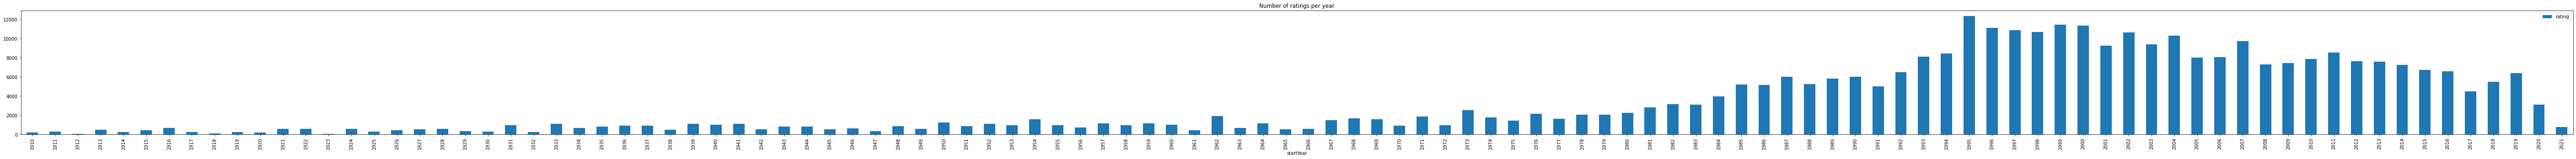

In [14]:
df[['startYear', 'rating']].groupby(['startYear']).count().reset_index().plot.bar(x='startYear', y='rating', title='Number of ratings per year', figsize=(100, 5));

In [15]:
df['startYear'].value_counts()

1995    12307
1999    11416
2000    11320
1996    11091
1997    10860
        ...  
1910      210
1920      194
1918       90
1923       80
1912       60
Name: startYear, Length: 112, dtype: int64

We can see that 1995 provided the highest number of ratings with 12307 ratings. Also, the top 5 years with most ratings came between 1995 and 2000.

### Distribution of different rating values

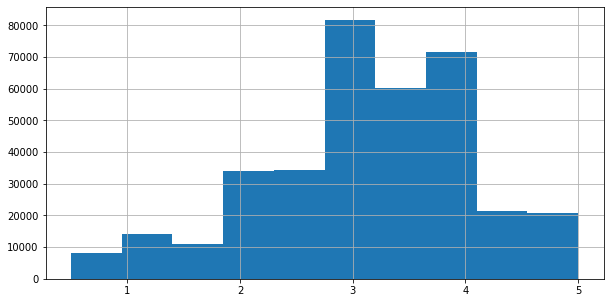

In [16]:
df['rating'].hist(figsize=(10, 5)); 

### Top 10 Users based on number of ratings (188 Unique Users)

In [17]:
df['userId'].value_counts().nlargest(n=10)

57548     3166
72315     2932
107650    2793
20055     2792
33844     2621
89464     2600
97452     2592
143049    2572
92046     2569
80974     2556
Name: userId, dtype: int64

We can see that the user with userId 57548 is the top user with 3166 reviews. 

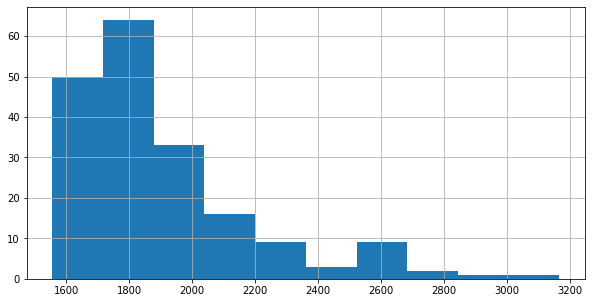

In [18]:
df['userId'].value_counts().hist(figsize=(10, 5));

From the histogram, we can observe that more than 60 users (about 33%) post about 1800 reviews, the highest frequency for number of reviews 

### Top 10 Movies based on number of reviews

In [19]:
df['movieId'].value_counts().nlargest(n=10)

1411     2116
3723     1863
2490     1422
595      1328
2252     1290
60072    1260
2640     1232
1954     1225
111      1225
81229    1210
Name: movieId, dtype: int64

In [20]:
top_movie = df[df['movieId'] == 1411]

In [21]:
top_movie.head(n=5)

,userId,movieId,rating,timestamp,title,genres_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes,directors,writers
172106,1748,1411,2.0,2006-04-03 02:14:22,Hamlet,Crime|Drama|Romance,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,5.0,24,nm0099901,nm0000636
172107,1748,1411,2.0,2006-04-03 02:14:22,Hamlet,Crime|Drama|Romance,tt0001240,movie,Hamlet,Hamlet,0,1911,\N,\N,Drama,3.9,11,nm0088881,nm0000636
172108,1748,1411,2.0,2006-04-03 02:14:22,Hamlet,Crime|Drama|Romance,tt0002922,movie,Hamlet,Hamlet,0,1913,\N,64,Drama,5.3,44,nm0687575,nm0000636
172109,1748,1411,2.0,2006-04-03 02:14:22,Hamlet,Crime|Drama|Romance,tt0012249,movie,Hamlet,Hamlet,0,1921,\N,131,Drama,7.0,393,"nm0769942,nm0300544","nm0313819,nm0000636,nm0898985"
172110,1748,1411,2.0,2006-04-03 02:14:22,Hamlet,Crime|Drama|Romance,tt0040416,movie,Hamlet,Hamlet,0,1948,\N,154,Drama,7.6,15460,nm0000059,"nm0000636,nm0000059"


The movie with the most number of reviews (2116) is the movie with movieID 1411, Hamlet.

### Bottom 10 Movie based on number of reviews

In [22]:
df['movieId'].value_counts().nsmallest(n=10)

1797      29
801       33
149406    35
609       36
122890    36
194448    36
13        37
122896    38
631       38
156       38
Name: movieId, dtype: int64

In [23]:
btm_movie = df[df['movieId'] == 1797]

In [24]:
btm_movie.head(n=5)

,userId,movieId,rating,timestamp,title,genres_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,averageRating,numVotes,directors,writers
325856,1748,1797,5.0,2001-08-18 11:14:02,Everest,Documentary|IMAX,tt2719848,movie,Everest,Everest,0,2015,\N,121,"Action,Adventure,Biography",7.1,198860,nm0466349,"nm0629933,nm0064479"
325857,17941,1797,4.0,2001-05-19 03:30:10,Everest,Documentary|IMAX,tt2719848,movie,Everest,Everest,0,2015,\N,121,"Action,Adventure,Biography",7.1,198860,nm0466349,"nm0629933,nm0064479"
325858,18306,1797,2.0,2002-04-19 05:29:24,Everest,Documentary|IMAX,tt2719848,movie,Everest,Everest,0,2015,\N,121,"Action,Adventure,Biography",7.1,198860,nm0466349,"nm0629933,nm0064479"
325859,18628,1797,3.0,1999-01-19 23:29:30,Everest,Documentary|IMAX,tt2719848,movie,Everest,Everest,0,2015,\N,121,"Action,Adventure,Biography",7.1,198860,nm0466349,"nm0629933,nm0064479"
325860,20055,1797,3.0,2006-11-11 10:23:24,Everest,Documentary|IMAX,tt2719848,movie,Everest,Everest,0,2015,\N,121,"Action,Adventure,Biography",7.1,198860,nm0466349,"nm0629933,nm0064479"


The movie with the least number of reviews (29) is the movie with movieID 1797, Everest.

## Genres and Rating Analysis (Based on IMDB Rating)

### Finding number of unique genres

In [25]:
genres_unique = pd.DataFrame(df.genres_x.str.split('|').tolist()).stack().unique()

In [26]:
print('Unique genres:', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

Unique genres: ['Comedy' 'Crime' 'Drama' 'Thriller' 'Musical' 'Romance' 'War' 'Film-Noir'
 'Sci-Fi' 'Adventure' 'Western' 'Animation' 'Children' 'Action' 'Fantasy'
 'IMAX' 'Mystery' 'Horror' 'Documentary' '(no genres listed)']


In [27]:
df.drop_duplicates(subset= "movieId", inplace= True)

In [28]:
df_movie_genre = df[['movieId', 'title', 'genres_x', 'startYear']]

In [29]:
df_movie_genre.head()

,movieId,title,genres_x,startYear
0,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994
187,899,Singin' in the Rain,Comedy|Musical|Romance,1952
332,1088,Dirty Dancing,Drama|Musical|Romance,1987
485,1175,Delicatessen,Comedy|Drama|Romance,1991
599,1217,Ran,Drama|War,1985


In [30]:
df_movie_genre = df_movie_genre.join(df.genres_x.str.get_dummies().astype(bool))
df_movie_genre.drop('genres_x', inplace=True, axis=1)

In [31]:
df_movie_genre = df_movie_genre.reset_index()


In [32]:
df_movie_genre = df_movie_genre.drop(columns = 'index')

In [33]:
df_movie_genre.head(n=5)

,movieId,title,startYear,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,296,Pulp Fiction,1994,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,899,Singin' in the Rain,1952,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2,1088,Dirty Dancing,1987,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,1175,Delicatessen,1991,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,1217,Ran,1985,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


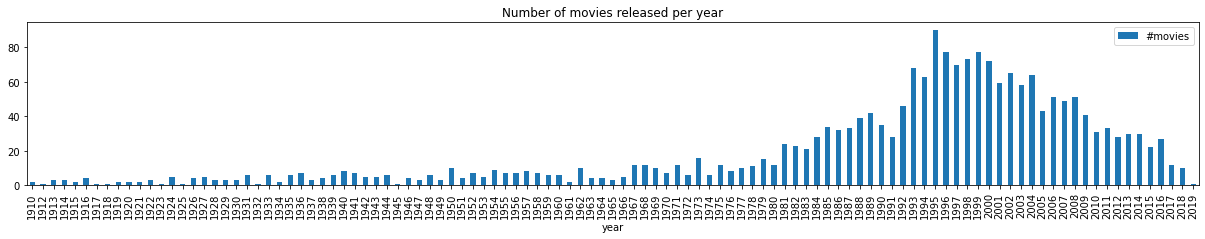

In [34]:
df_temp = df_movie_genre[['startYear', 'movieId']].groupby(['startYear']).count().reset_index().rename(columns={'startYear':'year', 'movieId':'#movies'})
df_temp.plot.bar('year', '#movies', title='Number of movies released per year', figsize=(21, 3));

We can observe that most of the movies released in the dataset are in the 1990s era

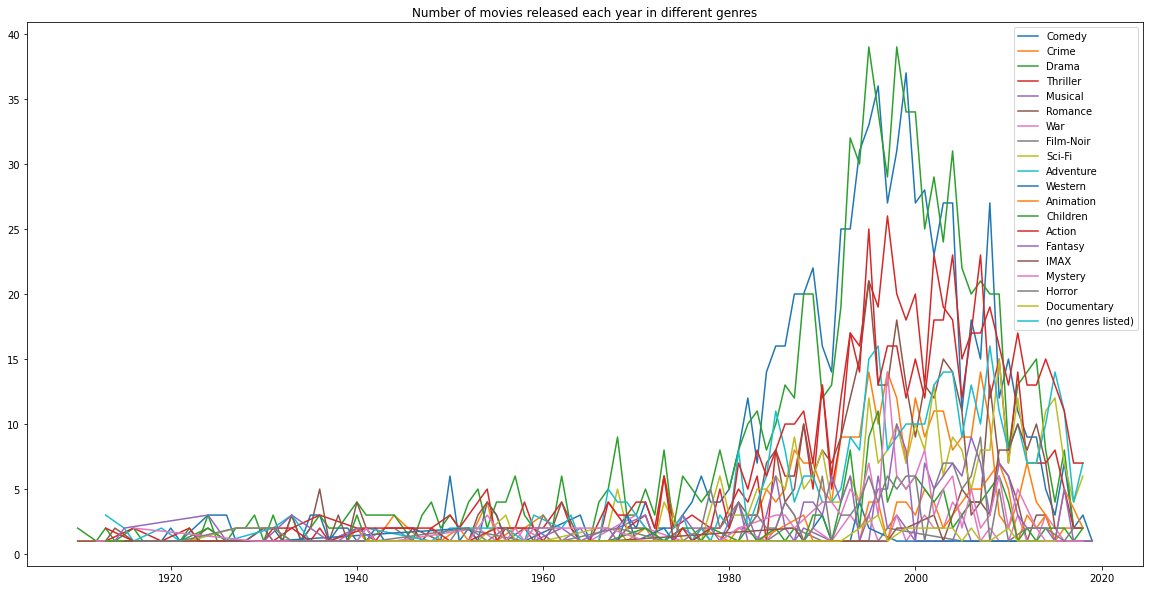

In [35]:
plt.figure(figsize=(20,10)) 
for genre in genres_unique.genre:
    df_temp = df_movie_genre[df_movie_genre[genre]==True][['startYear', 'movieId']]
    df_temp = df_temp.groupby(['startYear']).count().reset_index().rename(columns={'startYear':'year', 'movieId':'#movies'})
    plt.plot(df_temp['year'], df_temp['#movies'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()

From the graph, we can see that there was a trend for Comedy and Drama genred movies in the late 1990s to 2000s

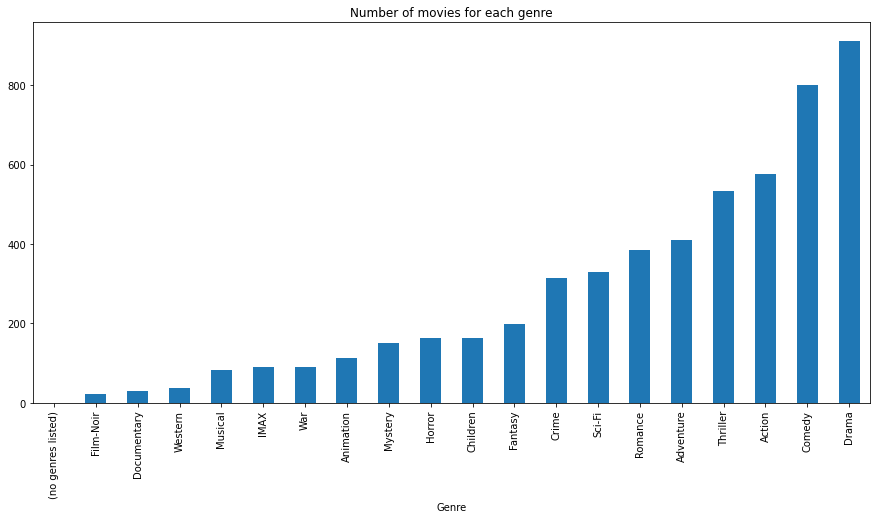

In [36]:
df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
for genre in genres_unique.genre:
    row = [genre, df_movie_genre[df_movie_genre[genre]==True][['movieId']].count()]
    df_temp.loc[len(df_temp)] = row
df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
df_temp = df_temp.sort_values('num_movies', ascending=True).set_index('genre')
plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,7))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('Genre');

From the graph, we can observe that although there is a (no genres listed) value, it is empty and all movies are tagged with a genre. Drama and Comedy lead the way in terms of number of movies followed by Action and Thriller. Film-Noi and Documentary are the least released genre overall

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 357866
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   userId          2073 non-null   int64         
 1   movieId         2073 non-null   int64         
 2   rating          2073 non-null   float64       
 3   timestamp       2073 non-null   datetime64[ns]
 4   title           2073 non-null   object        
 5   genres_x        2073 non-null   object        
 6   tconst          2073 non-null   object        
 7   titleType       2073 non-null   object        
 8   primaryTitle    2073 non-null   object        
 9   originalTitle   2073 non-null   object        
 10  isAdult         2073 non-null   int64         
 11  startYear       2073 non-null   int64         
 12  endYear         2073 non-null   object        
 13  runtimeMinutes  2073 non-null   object        
 14  genres_y        2073 non-null   object        
 15  av

In [39]:
df1 = pd.read_csv('full_data_new.csv')

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357955 entries, 0 to 357954
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      357955 non-null  int64  
 1   userId          357955 non-null  int64  
 2   movieId         357955 non-null  int64  
 3   rating          357955 non-null  float64
 4   timestamp       357955 non-null  int64  
 5   title           357955 non-null  object 
 6   genres_x        357955 non-null  object 
 7   tconst          357955 non-null  object 
 8   titleType       357955 non-null  object 
 9   primaryTitle    357955 non-null  object 
 10  originalTitle   357955 non-null  object 
 11  isAdult         357955 non-null  int64  
 12  startYear       357955 non-null  int64  
 13  endYear         357955 non-null  object 
 14  runtimeMinutes  357955 non-null  object 
 15  genres_y        357955 non-null  object 
 16  averageRating   357955 non-null  float64
 17  numVotes  

In [42]:
df_rating = df1[['userId', 'movieId', 'rating']]

In [43]:
df_rating

,userId,movieId,rating
0,1748,296,3.0
1,1920,296,5.0
2,2177,296,4.0
3,2982,296,5.0
4,3150,296,3.5
...,...,...,...
357950,151214,1913,2.0
357951,156480,1913,4.5
357952,160747,1913,3.5
357953,162047,1913,1.0


In [45]:
df_final = df_rating.merge(df_movie_genre, left_on='movieId', right_on='movieId', how='left')
df_final.head()

,userId,movieId,rating,title,startYear,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1748,296,3.0,Pulp Fiction,1994,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1920,296,5.0,Pulp Fiction,1994,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2177,296,4.0,Pulp Fiction,1994,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2982,296,5.0,Pulp Fiction,1994,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,3150,296,3.5,Pulp Fiction,1994,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


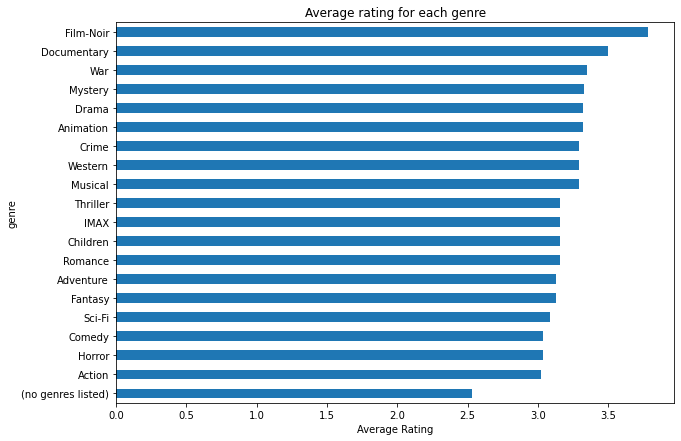

In [46]:
df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
for genre in genres_unique.genre:
    row = [genre, round(df_final[df_final[genre]==True][['rating']].mean(), 2).to_string()[6:]]
    df_temp.loc[len(df_temp)] = row
df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,7))
plot_fig.set_title('Average rating for each genre')
plot_fig.set_xlabel('Average Rating');

From the graph, we can see that Film-Noir has the highest average rating (though it having few movies released) followed by Documentary and Wall. Horror and Action had the lowest average rating among all genres